In [ ]:
from cmath import nan
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment=None
import seaborn as sb
import string

In [ ]:
# import pandas as pd
import io

df = pd.read_csv('no_null_df.csv')
# print(df)


In [ ]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0

Matplotlib version:  3.2.2


In [ ]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
df_make=df.groupby('Make',axis=0).mean()
df_make=df_make.reset_index()
df_make
# df_make.describe()


,Make,Unnamed: 0,Unnamed: 0.1,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,...,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
0,Aston Martin,820.000000,820.000000,3.626744e+07,5038.333333,10.666667,4.000000,81.166667,1294.333333,4623.000000,...,1.000000,0.666667,0.666667,0.666667,0.333333,0.666667,1.000000,1.000000,1.000000,1.000000
1,Audi,522.387097,522.387097,7.240431e+06,2256.354839,5.161290,4.774194,65.193548,1544.709677,4715.096774,...,0.903226,0.967742,0.967742,0.774194,0.967742,1.000000,1.000000,0.774194,1.000000,1.000000
2,Bajaj,357.500000,357.500000,2.730000e+05,216.000000,4.000000,1.000000,52.000000,1652.000000,2752.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bentley,652.166667,652.166667,4.056585e+07,5447.833333,10.666667,4.000000,88.333333,1563.666667,5210.166667,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Bmw,719.702703,719.702703,8.256216e+06,2707.918919,5.459459,4.000000,63.756757,1541.486486,4816.891892,...,0.783784,0.945946,0.972973,0.864865,0.972973,0.972973,0.972973,1.000000,1.000000,0.972973
5,Bugatti,355.500000,355.500000,2.021492e+08,7993.000000,16.000000,4.000000,52.000000,1212.000000,4544.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,Datsun,26.800000,26.800000,4.509077e+05,1065.066667,3.000000,4.000000,32.200000,1520.600000,3644.400000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Dc,262.000000,262.000000,3.407407e+06,2000.000000,4.000000,4.000000,60.000000,1200.000000,4565.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
8,Ferrari,802.000000,802.000000,4.287250e+07,4589.500000,8.500000,4.000000,86.750000,1275.250000,4668.125000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,Fiat,668.652174,668.652174,7.795563e+05,1269.391304,4.000000,4.000000,45.608696,1517.739130,4195.086957,...,0.304348,0.000000,0.000000,0.695652,0.000000,0.217391,0.304348,0.347826,0.000000,0.086957


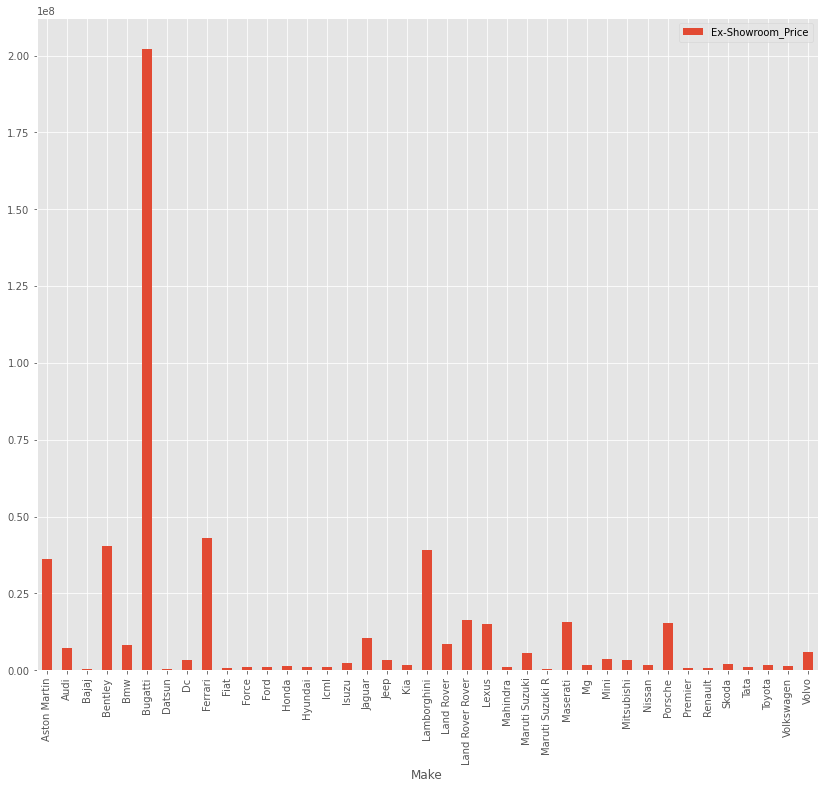

In [ ]:
df_make.plot(x='Make',y='Ex-Showroom_Price' ,kind='bar',figsize=(14, 12))
plt.show()

In [ ]:
import seaborn as sns
# seaborn.pairplot(df, hue ='sex')
plt.show()

In [ ]:
df['Displacement'].unique()

array([ 624.,  799.,  999., 1196.,  998., 1198., 1086., 1199., 1197.,
       1173., 1489., 1248., 1364., 1193., 1396., 1186., 1498., 1194.,
       1496., 1461., 1368., 1956., 2999., 2157., 1968., 1997., 1597.,
       1798., 1395., 1595., 2143., 1991., 2000., 1998., 1969., 1999.,
       1984., 1995., 2995., 2993., 2998., 4951., 2987., 6417., 3604.,
       2996., 2979., 1988., 5461., 2982., 3456., 2894., 6592., 3982.,
       2925., 4691., 5980., 4663., 3996., 4461., 5204., 5998., 3855.,
       5950., 5198., 4497., 6593., 6752., 6750., 6749., 7993.,  216.,
        796., 1120., 1497., 1994., 1298., 1397., 1493., 2523., 1591.,
       1582., 1598., 1859., 2498., 2596., 2149., 1462., 2179.,   72.,
       2393., 2694., 2755., 1799., 2199., 3198., 2198., 2400., 1950.,
       2967., 4999., 4367., 3993., 3902., 3900., 6262., 6498., 6598.,
       1172., 2489., 1353., 1500., 1596., 2487., 2494., 2981., 3799.,
       5935., 6496., 2499., 1898., 2360., 1993., 4395., 5000., 5700.,
       1047., 2200.,

In [ ]:
df_disp=df.groupby('Displacement',axis=0).mean()
df_disp=df_make.reset_index()
df_disp=df_disp.sort_values(by=['Displacement'],ascending=True)

df_disp

,index,Make,Unnamed: 0,Unnamed: 0.1,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,...,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
2,2,Bajaj,357.500000,357.500000,2.730000e+05,216.000000,4.000000,1.000000,52.000000,1652.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,6,Datsun,26.800000,26.800000,4.509077e+05,1065.066667,3.000000,4.000000,32.200000,1520.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25,25,Maruti Suzuki R,1179.500000,1179.500000,5.151287e+05,1083.285714,3.000000,4.000000,32.000000,1671.071429,...,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33,33,Renault,379.611111,379.611111,8.011078e+05,1238.583333,3.555556,4.000000,41.555556,1612.833333,...,0.222222,0.138889,0.388889,0.305556,0.138889,0.083333,0.305556,0.055556,0.111111,0.194444
9,9,Fiat,668.652174,668.652174,7.795563e+05,1269.391304,4.000000,4.000000,45.608696,1517.739130,...,0.304348,0.000000,0.000000,0.695652,0.000000,0.217391,0.304348,0.347826,0.000000,0.086957
32,32,Premier,83.500000,83.500000,6.376038e+05,1343.500000,4.000000,4.000000,46.000000,1730.000000,...,0.000000,0.000000,0.000000,0.666667,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
13,13,Hyundai,632.623077,632.623077,9.874765e+05,1354.469231,3.938462,4.000000,45.507692,1544.461538,...,0.438462,0.100000,0.623077,0.407692,0.315385,0.130769,0.438462,0.261538,0.107692,0.315385
35,35,Tata,511.260000,511.260000,9.371146e+05,1421.260000,3.480000,3.880000,42.690000,1623.020000,...,0.540000,0.240000,0.490000,0.640000,0.370000,0.080000,0.100000,0.230000,0.150000,0.090000
12,12,Honda,674.484375,674.484375,1.206137e+06,1444.875000,4.000000,4.000000,40.343750,1542.640625,...,0.828125,0.125000,0.125000,0.359375,0.593750,0.109375,0.343750,0.109375,0.046875,0.546875
37,37,Volkswagen,426.205882,426.205882,1.321924e+06,1466.294118,3.823529,3.882353,51.294118,1482.117647,...,0.529412,0.500000,0.794118,0.441176,0.176471,0.382353,0.676471,0.117647,0.205882,0.735294


In [ ]:
#Pie Charts
cols=df.columns
for c in cols:
    if(df[c].dtype==object):
        if(df[c].nunique()<10):
            print(c," ",df[c].unique())

Drivetrain   ['RWD (Rear Wheel Drive)' 'FWD (Front Wheel Drive)'
 'AWD (All Wheel Drive)' '4WD']
Cylinder_Configuration   ['In-line' 'V' 'Flat' 'W']
Emission_Norm   ['BS IV' 'BS 6' 'BS III' 'BS VI']
Engine_Location   ['Rear, Transverse' 'Front, Transverse' 'Front, Longitudinal'
 'Rear Mid, Transverse' 'Mid, Longitudinal' 'Mid, Transverse'
 'Rear, Longitudinal']
Fuel_System   ['Injection' 'PGM - Fi']
Fuel_Type   ['Petrol' 'CNG' 'Diesel' 'CNG + Petrol' 'Hybrid' 'Electric']
Gears   ['4' '5' '6' '7' '9' '8' '7 Dual Clutch' 'Single Speed Reduction Gear']
Front_Brakes   ['Drum' 'Ventilated Disc' 'Solid Disc']
Rear_Brakes   ['Drum' 'Ventilated Disc' 'Solid Disc']
Power_Steering   ['Electric Power' 'TRUE' 'Hydraulic Power'
 'Electric Power, Hydraulic Power' 'Electro-Hydraulic']
Power_Windows   ['Only Front Windows' 'All Windows']
Keyless_Entry   ['Remote' 'Smart Key' 'TRUE' 'Remote, Smart Key' 'Smart Key, Remote']
Odo   ['Digital' 'Analog' 'Digital, Analog' 'TRUE']
Speedo   ['Analog' 'Digital'

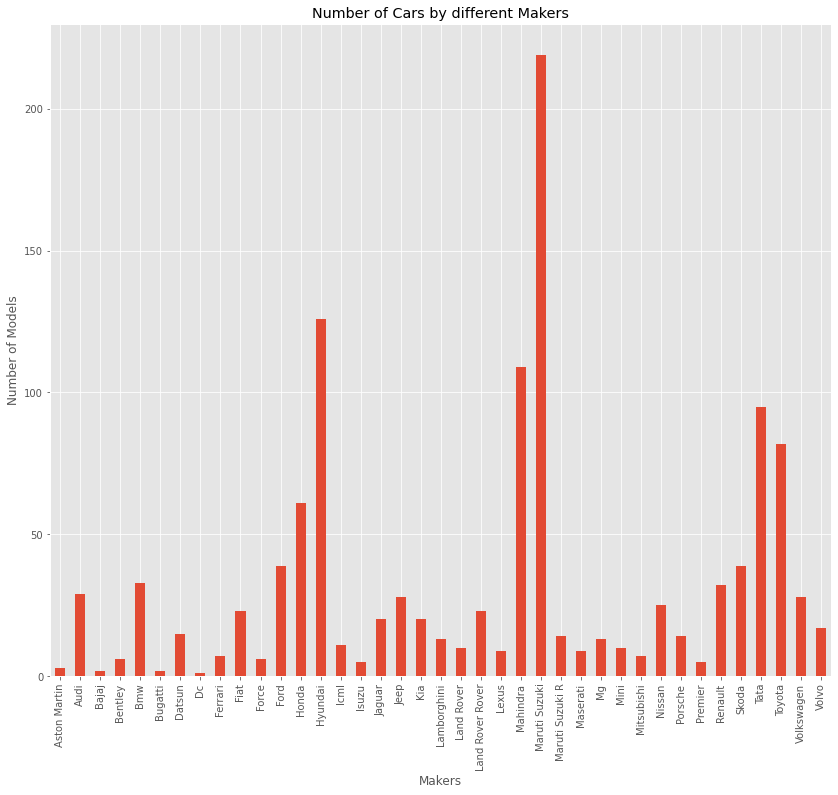

In [ ]:
df_u_make=df.groupby(['Make'])['Ex-Showroom_Price'].nunique()
df_u_make.plot(kind='bar' , figsize=(14, 12))

plt.title('Number of Cars by different Makers')
plt.ylabel('Number of Models')
plt.xlabel('Makers')

plt.show()



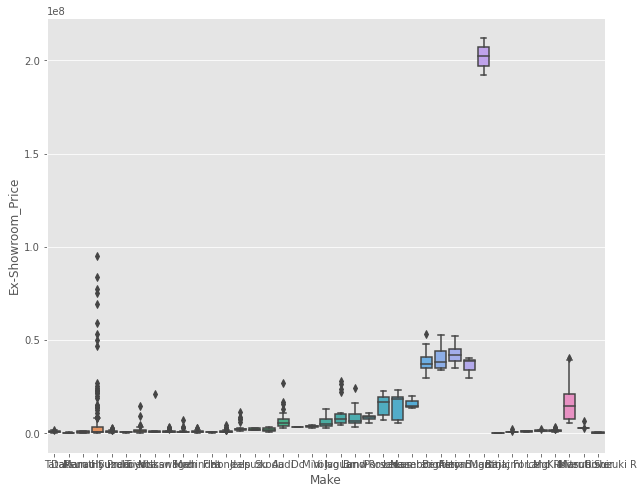

In [ ]:

plt.rcParams['figure.figsize'] = (10,8)
sns.boxplot(x=df["Make"],y=df['Ex-Showroom_Price'])
plt.show()

In [ ]:
df_make_unique = df['Make'].unique()
df_make_unique=df_make_unique.tolist()
df_make_unique


['Tata',
 'Datsun',
 'Renault',
 'Maruti Suzuki',
 'Hyundai',
 'Premier',
 'Toyota',
 'Nissan',
 'Volkswagen',
 'Ford',
 'Mahindra',
 'Fiat',
 'Honda',
 'Jeep',
 'Isuzu',
 'Skoda',
 'Audi',
 'Dc',
 'Mini',
 'Volvo',
 'Jaguar',
 'Bmw',
 'Land Rover',
 'Porsche',
 'Lexus',
 'Maserati',
 'Lamborghini',
 'Bentley',
 'Ferrari',
 'Aston Martin',
 'Bugatti',
 'Bajaj',
 'Icml',
 'Force',
 'Mg',
 'Kia',
 'Land Rover Rover',
 'Mitsubishi',
 'Maruti Suzuki R']

In [ ]:
def divide_chunks(l, n):
    for i in range(0, len(l), n): 
        yield l[i:i + n]
  
n = 5
  
df_make_unique = list(divide_chunks(df_make_unique, n))
print (df_make_unique)

[['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai'], ['Premier', 'Toyota', 'Nissan', 'Volkswagen', 'Ford'], ['Mahindra', 'Fiat', 'Honda', 'Jeep', 'Isuzu'], ['Skoda', 'Audi', 'Dc', 'Mini', 'Volvo'], ['Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus'], ['Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin'], ['Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg'], ['Kia', 'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R']]


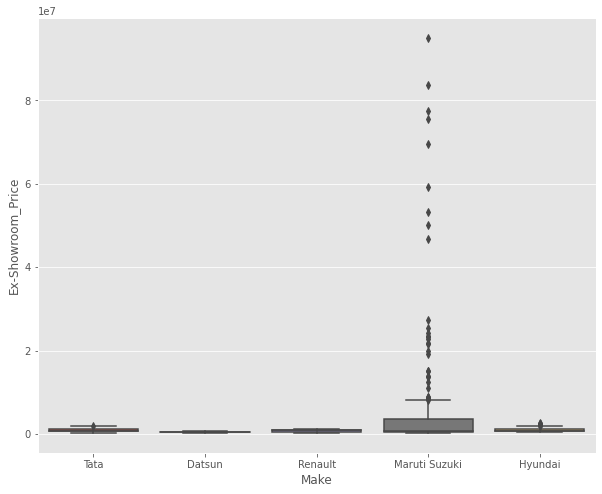

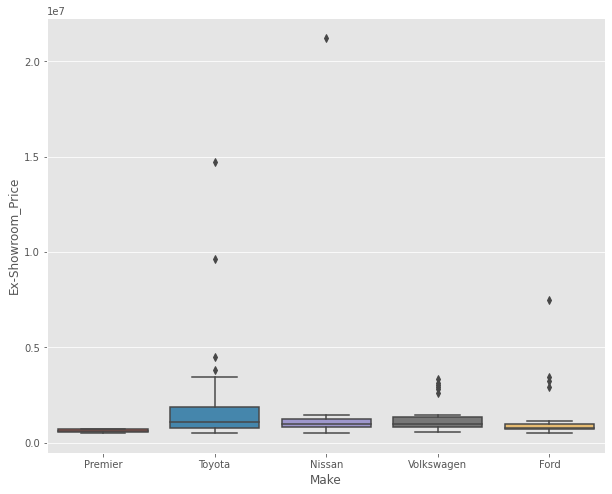

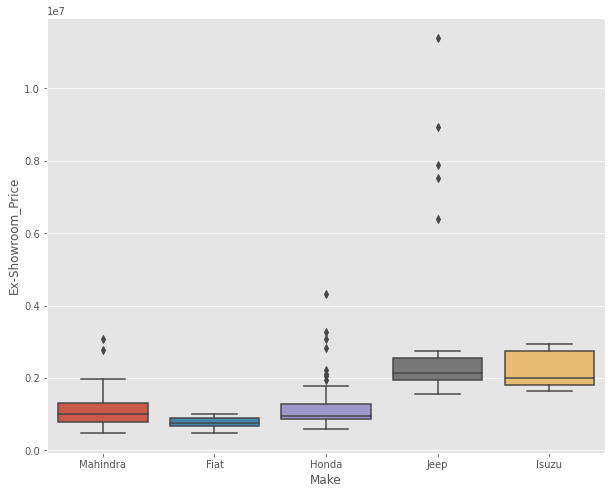

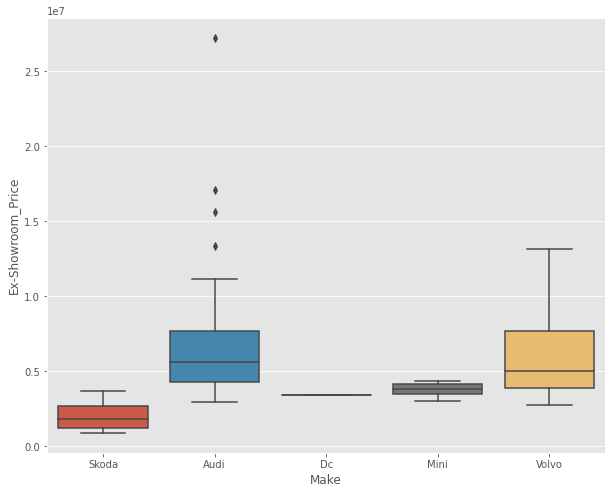

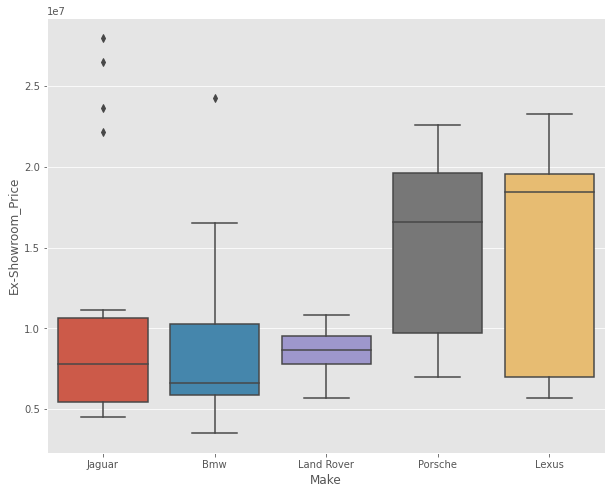

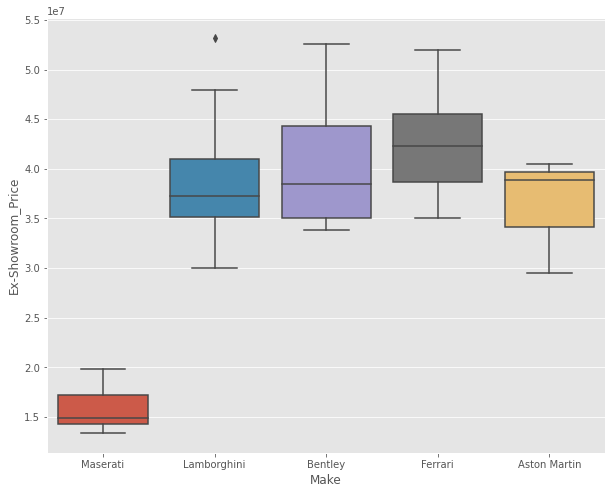

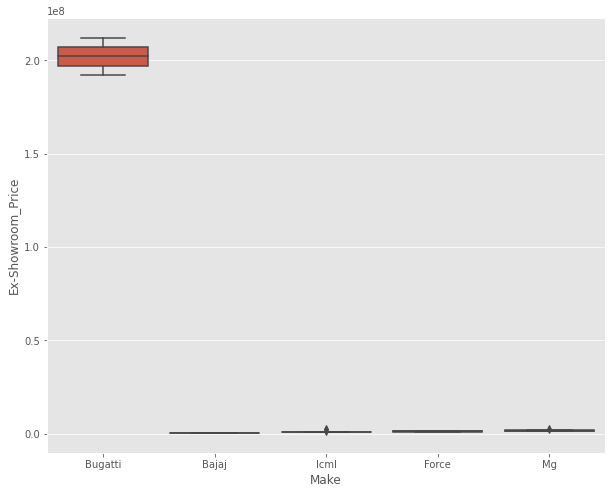

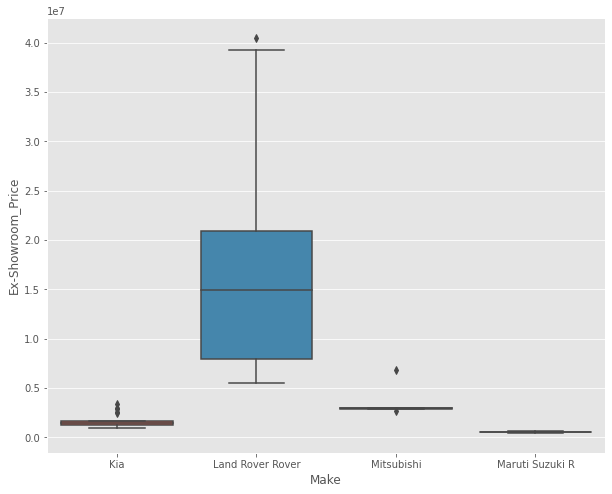

In [ ]:
for index in range(len(df_make_unique)):
    abc = pd.DataFrame()
    
    # print(df_make_unique[index])
    
    for i in range(len(df_make_unique[index])):
        # print(df.loc[df['Make'] == df_make_unique[index][i]].head())
        abc = abc.append(df.loc[df['Make'] == df_make_unique[index][i]])
    # print(abc[abc.index.duplicated()])
    # abc = abc[~abc.index.duplicated(keep='first')]
    # print(abc)
    sns.boxplot(x=abc['Make'],y=df['Ex-Showroom_Price'])
    plt.show()
    del abc
    # abc.iloc[0:0]


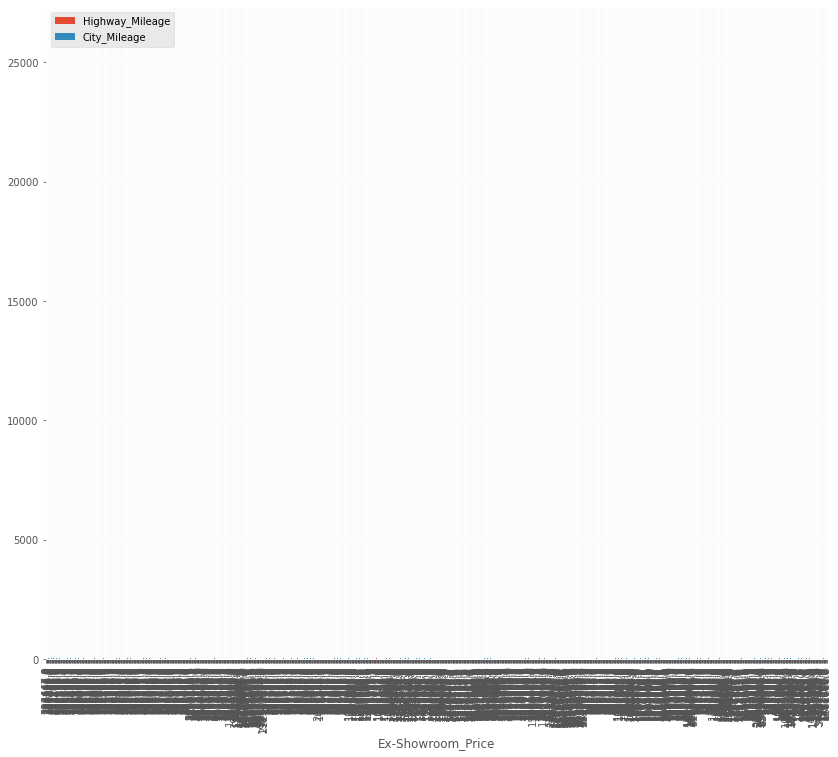

In [ ]:
cph_mileage = df[['Highway_Mileage','City_Mileage','Ex-Showroom_Price']]
# cph_mileage
cph_mileage.plot(y=['Highway_Mileage','City_Mileage'],x='Ex-Showroom_Price' ,kind='bar',figsize=(14, 12))

plt.show()


In [ ]:
#Binning
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# # draw historgram of attribute "horsepower" with bins = 3
# plt.pyplot.hist(df["horsepower"], bins = 3)

# # set x/y labels and plot title
# plt.pyplot.xlabel("horsepower")
# plt.pyplot.ylabel("count")
# plt.pyplot.title("horsepower bins")

<BarContainer object of 3 artists>

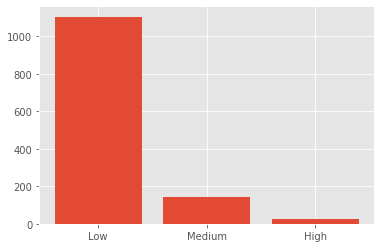

In [ ]:
bins = np.linspace(min(df["Displacement"]), max(df["Displacement"]), 4)
bins

group_names = ['Low', 'Medium', 'High']

df['Displacement-binned'] = pd.cut(df['Displacement'], bins, labels=group_names, include_lowest=True )


df[['Displacement','Displacement-binned']].head(20)


df["Displacement-binned"].value_counts()

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Displacement-binned"].value_counts())


# set x/y labels and plot title
# plt.pyplot.xlabel("horsepower")
# plt.pyplot.ylabel("count")
# plt.pyplot.title("horsepower bins")

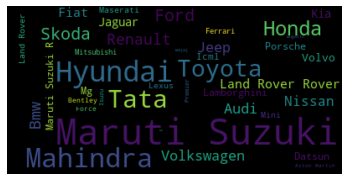

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud 


df_u_make=dict(df_u_make)
# df_u_make
wordcloud = WordCloud(collocations=False).generate_from_frequencies(df_u_make)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

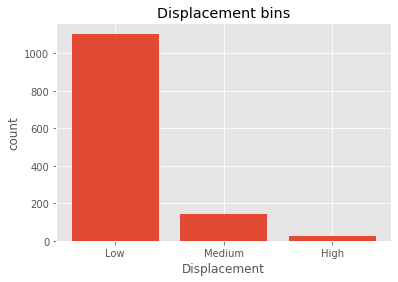

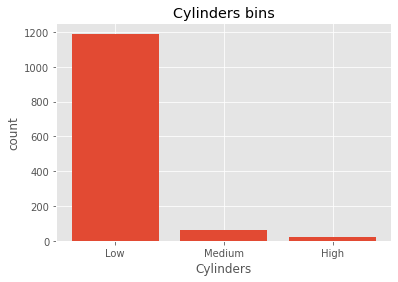

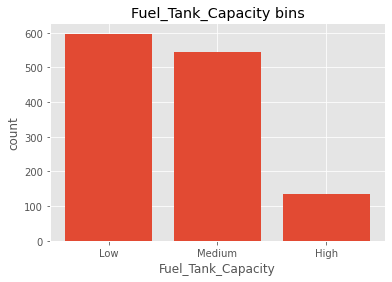

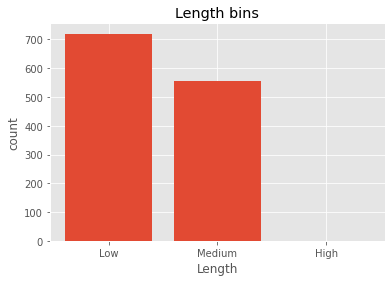

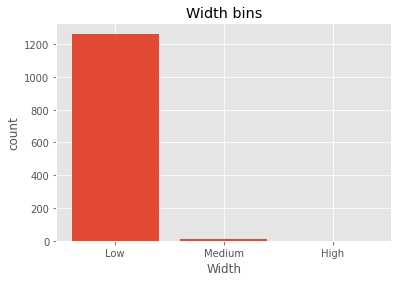

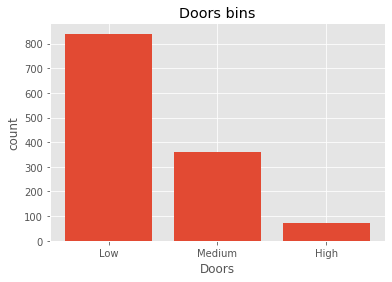

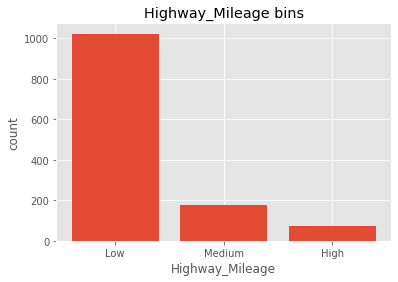

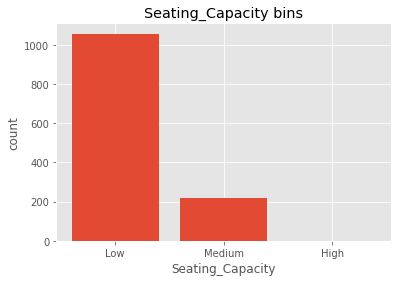

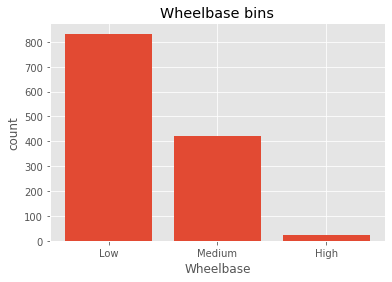

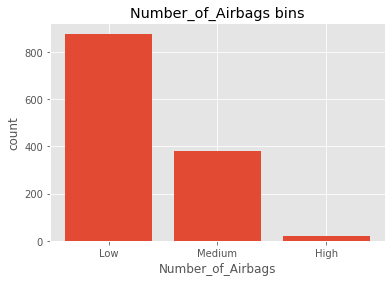

In [ ]:
hc = [
'Displacement',
'Cylinders',
'Fuel_Tank_Capacity',
'Length',
'Width',
'Doors',
'Highway_Mileage', 
'Seating_Capacity',
'Wheelbase',
'Number_of_Airbags']
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
for i in hc :
  bins = np.linspace(min(df[i]), max(df[i]), 4)

  group_names = ['Low', 'Medium', 'High']

  df[i+'-binned'] = pd.cut(df[i], bins, labels=group_names, include_lowest=True )
  
  pyplot.bar(group_names, df[i+"-binned"].value_counts())

  # set x/y labels and plot title
  plt.pyplot.xlabel(i)
  plt.pyplot.ylabel("count")
  plt.pyplot.title(i+" bins")
  plt.pyplot.show()

  # df[['Displacement','Displacement-binned']].head(20)


  # df["Displacement-binned"].value_counts()

  

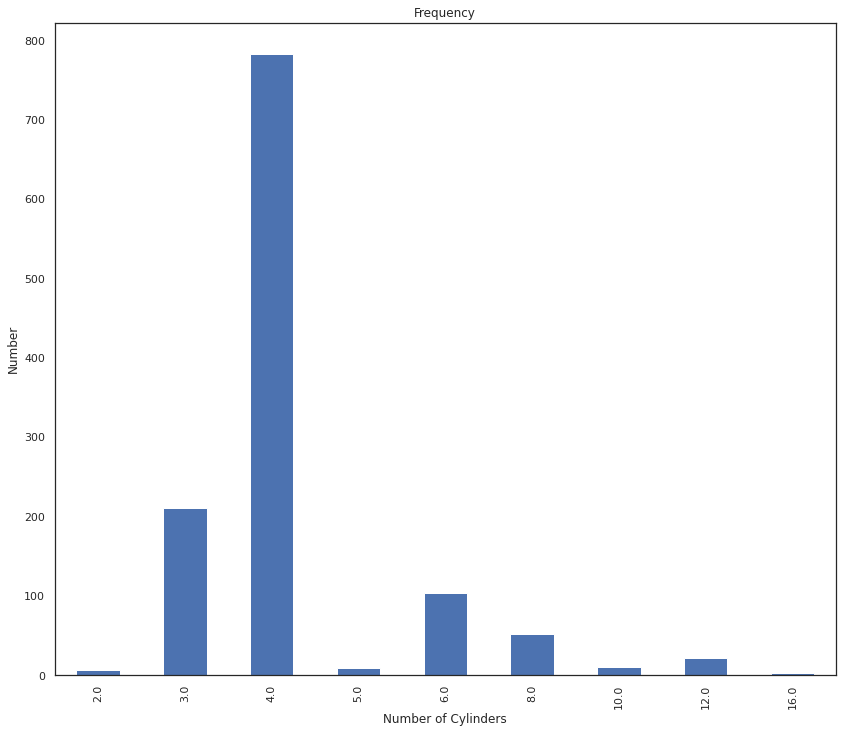

In [ ]:
df_u=df.groupby(['Cylinders'])['Ex-Showroom_Price'].nunique()
df_u.plot(kind='bar' , figsize=(14, 12))

plt.title('Frequency')
plt.ylabel('Number')
plt.xlabel('Number of Cylinders')

plt.show()

In [ ]:
bool_columns=df.select_dtypes(include=['bool']).columns
bool_columns=bool_columns.tolist()
bool_columns

['Start_/_Stop_Button',
 'Aux-in_Compatibility',
 'Average_Fuel_Consumption',
 'Bluetooth',
 'CD_/_MP3_/_DVD_Player',
 'Central_Locking',
 'Child_Safety_Locks',
 'Distance_to_Empty',
 'Engine_Malfunction_Light',
 'FM_Radio',
 'Low_Fuel_Warning',
 'Multifunction_Display',
 'Auto-Diing_Rear-View_Mirror',
 'Hill_Assist',
 'Gear_Indicator',
 'Engine_Iobilizer',
 'Seat_Back_Pockets',
 'ABS_(Anti-lock_Braking_System)',
 'Door_Ajar_Warning',
 'EBD_(Electronic_Brake-force_Distribution)',
 'Fasten_Seat_Belt_Warning',
 'Gear_Shift_Reminder',
 'Key_Off_Reminder',
 'USB_Compatibility',
 'Cigarette_Lighter',
 'Average_Speed',
 'EBA_(Electronic_Brake_Assist)',
 'Navigation_System',
 'Second_Row_AC_Vents',
 'iPod_Compatibility',
 'ESP_(Electronic_Stability_Program)',
 'Cooled_Glove_Box',
 'Turbocharger',
 'ISOFIX_(Child-Seat_Mount)',
 'Rain_Sensing_Wipers',
 'Leather_Wrapped_Steering',
 'Automatic_Headlamps',
 'ASR_/_Traction_Control',
 'Cruise_Control']

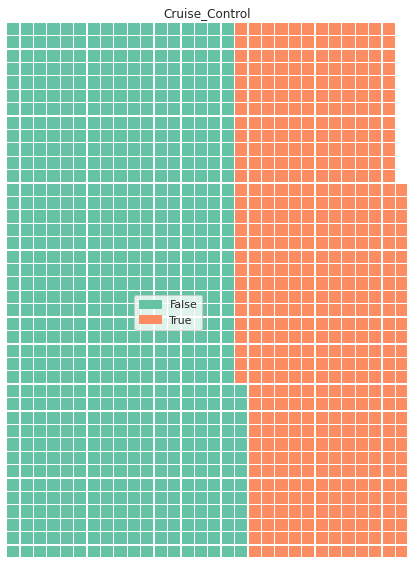

In [ ]:


df_u_tf=df.groupby(['Cruise_Control']).nunique()

df_u_tf=df_u_tf.reset_index()
df_u_tf
from pywaffle import Waffle
fig = plt.figure(
    FigureClass=Waffle, 
    rows=40, 
    values=list(df_u_tf['Ex-Showroom_Price']),
    labels=list(df_u_tf.Cruise_Control),
    title={
        'label': 'Cruise_Control',
    },
    figsize=(12, 8),
    legend={'bbox_to_anchor': (0.5, 0.5)}    
)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


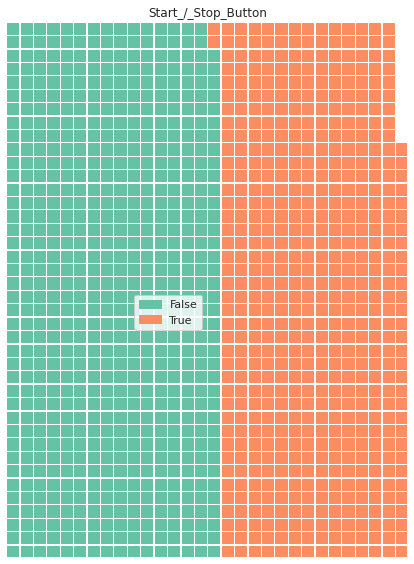

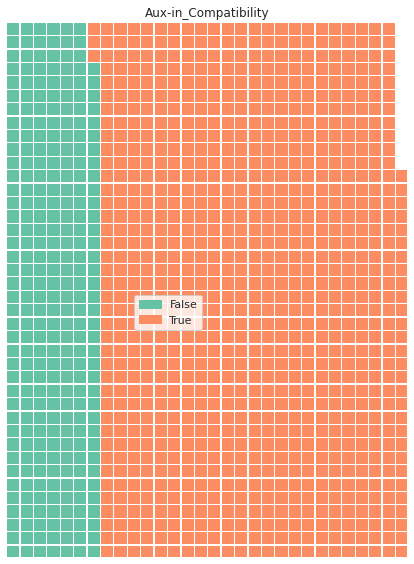

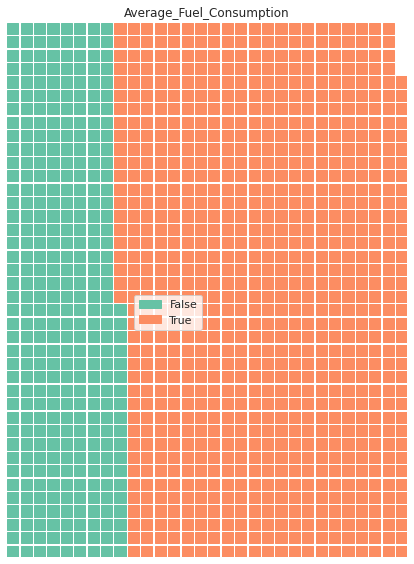

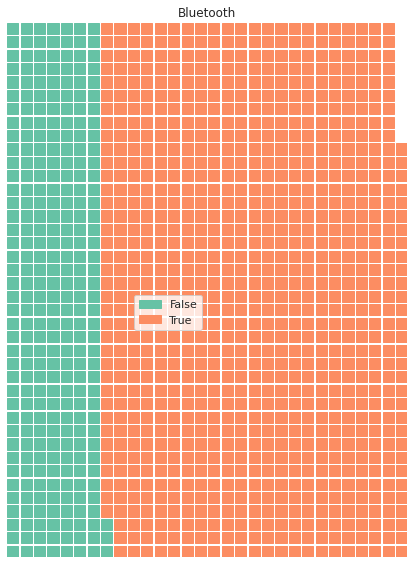

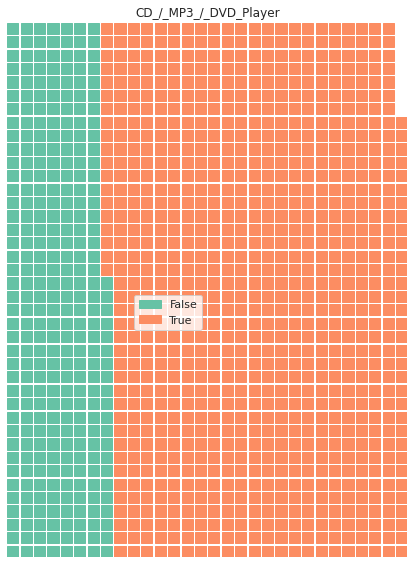

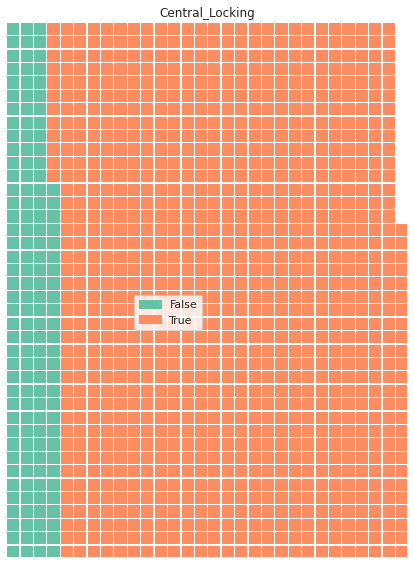

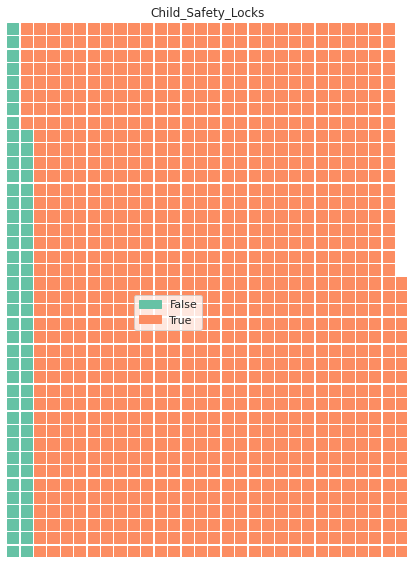

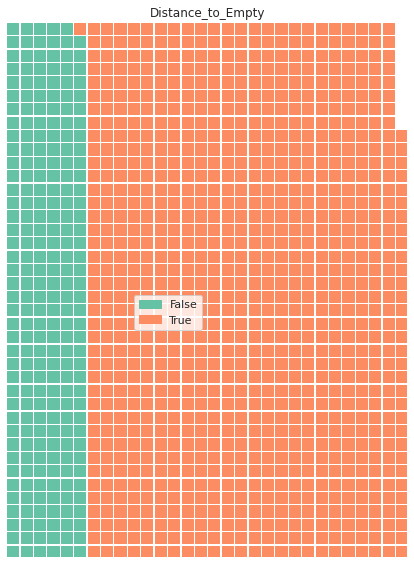

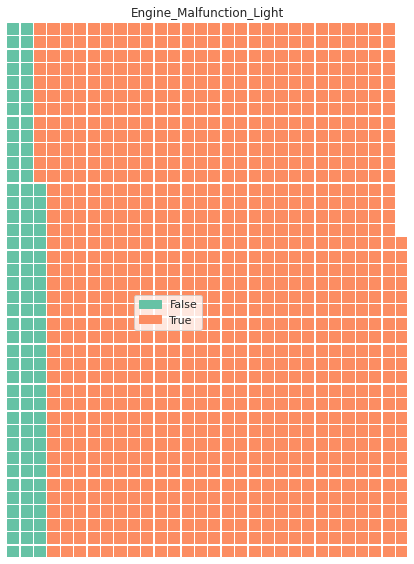

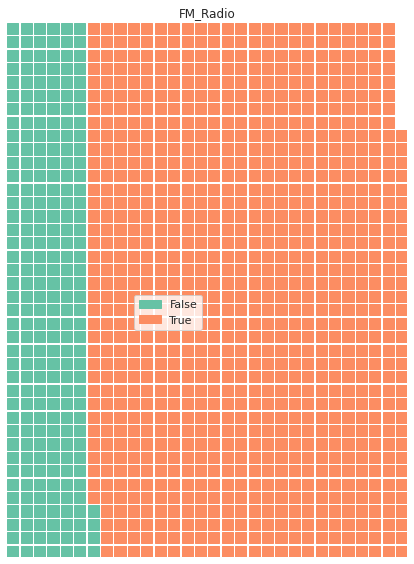

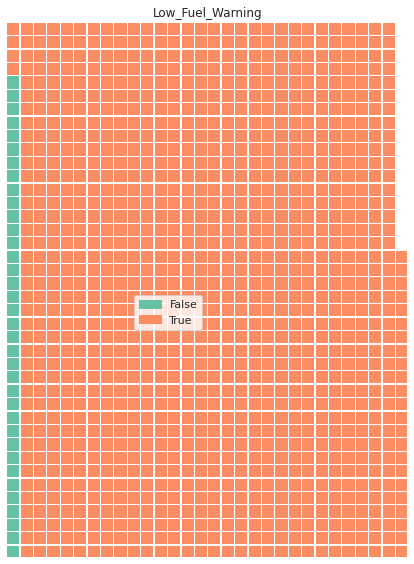

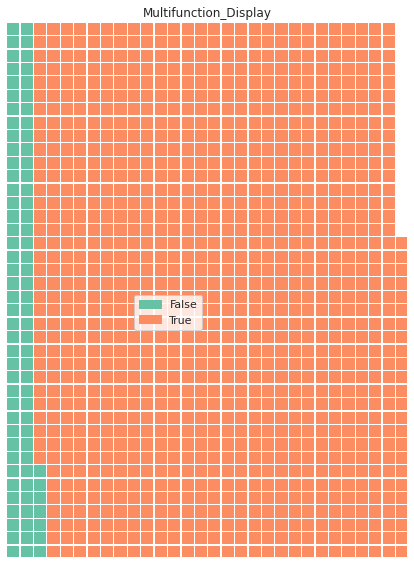

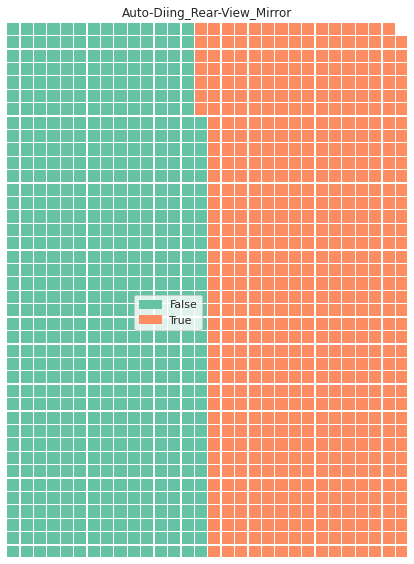

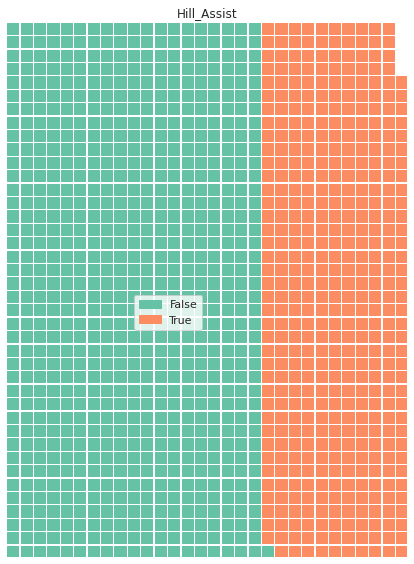

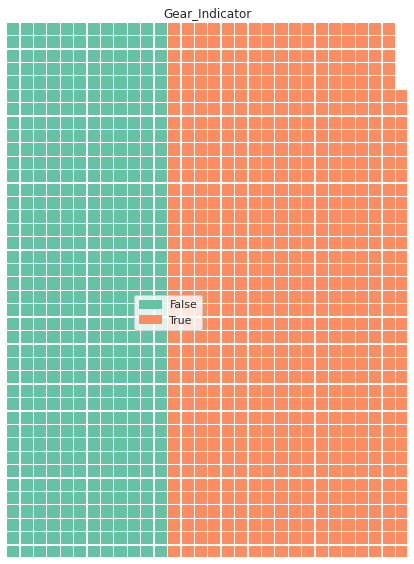

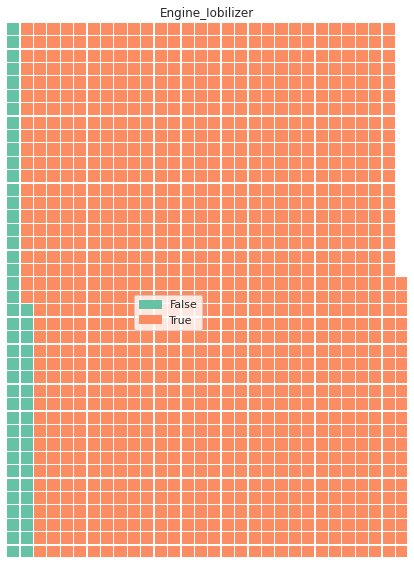

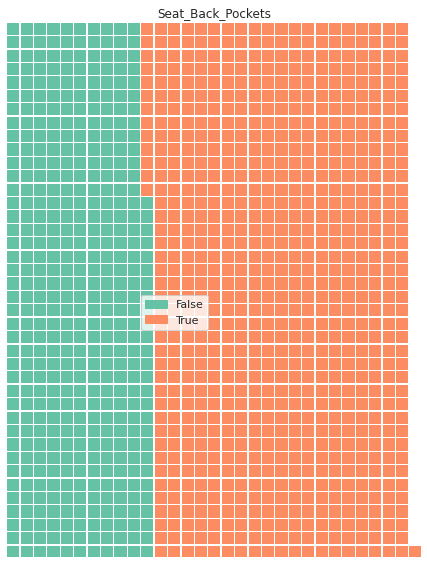

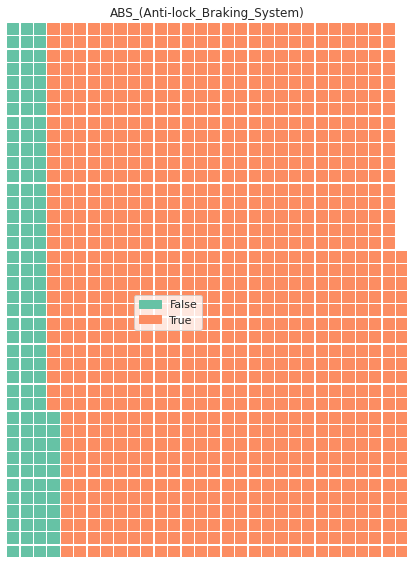

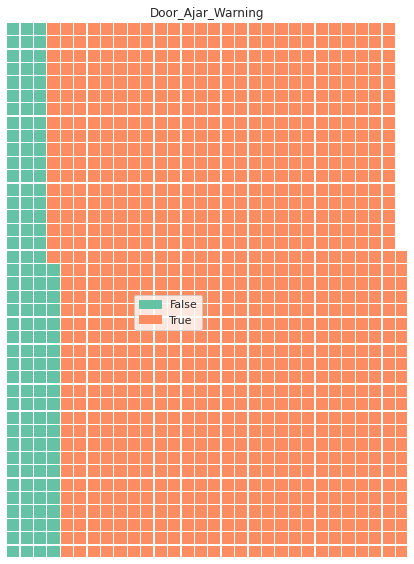

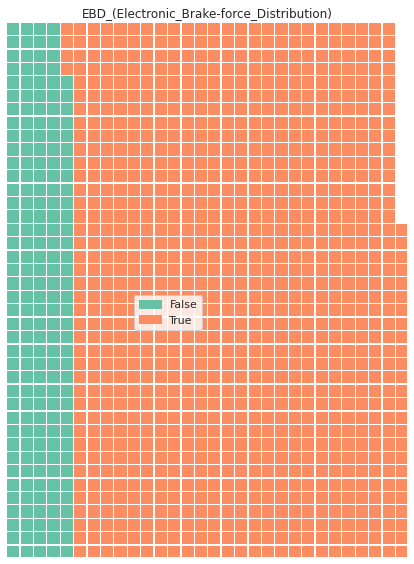

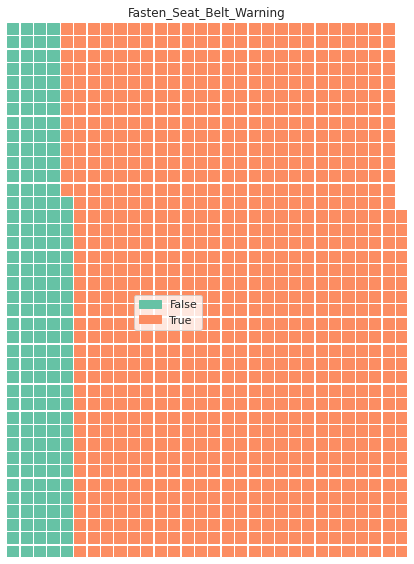

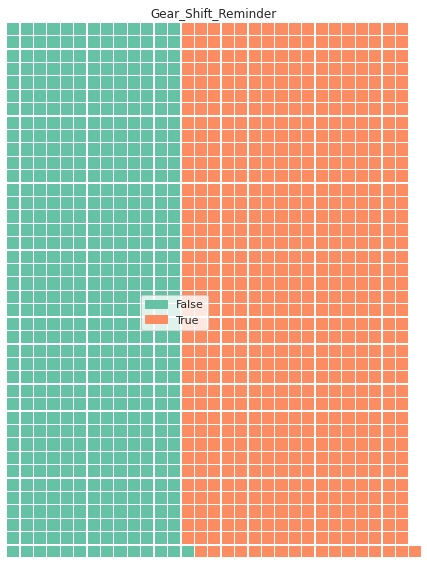

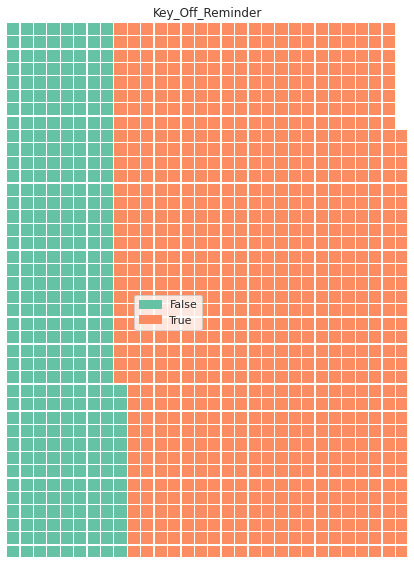

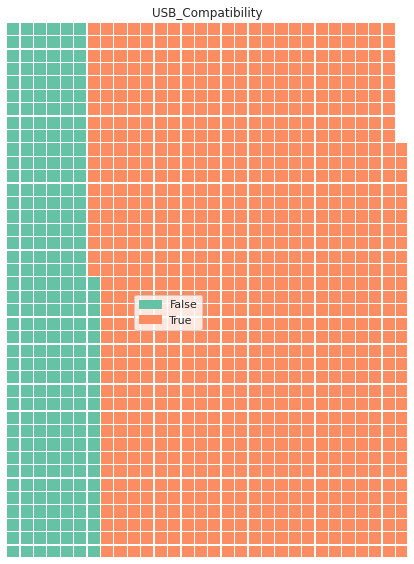

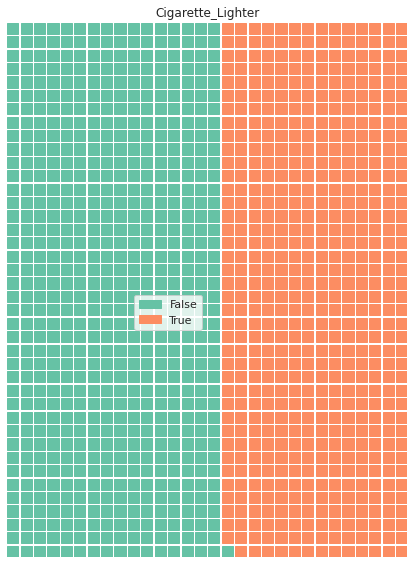

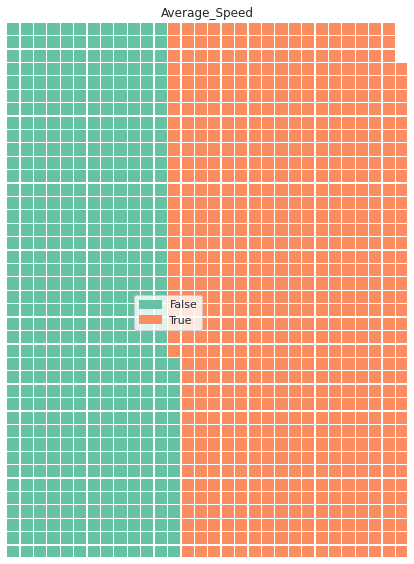

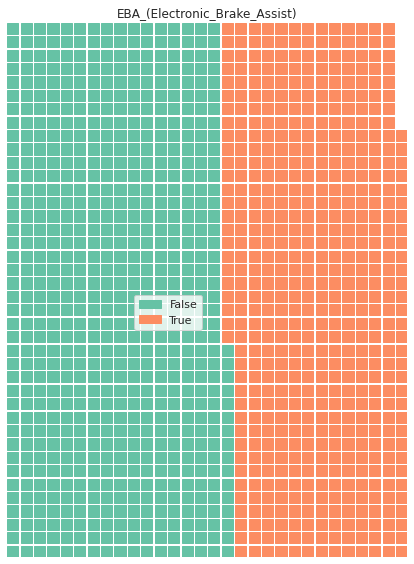

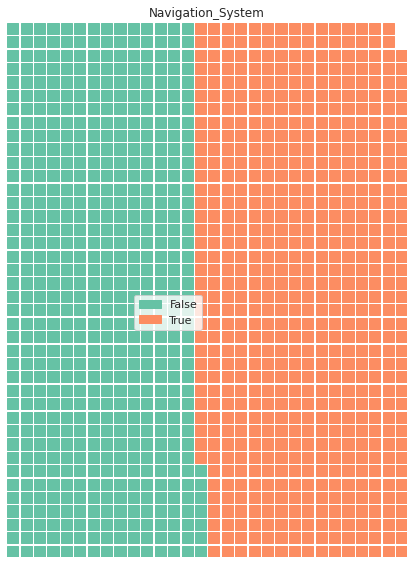

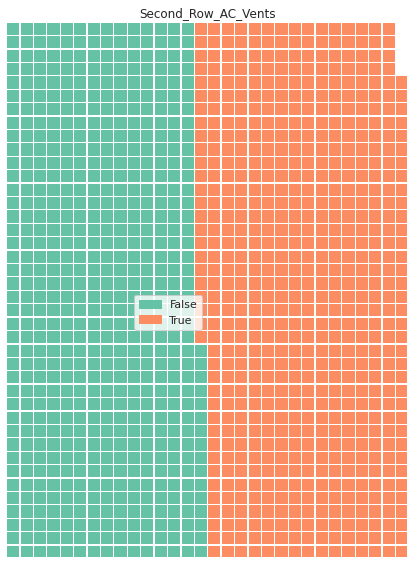

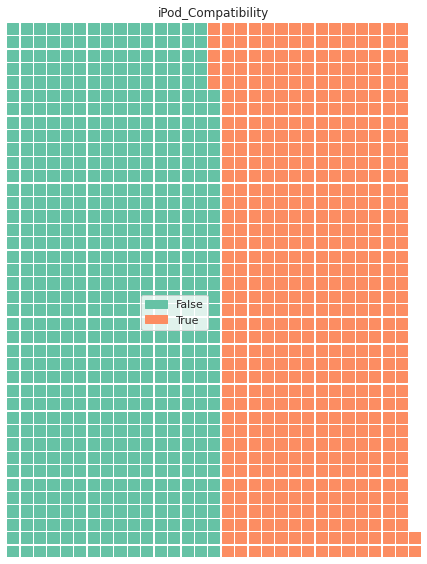

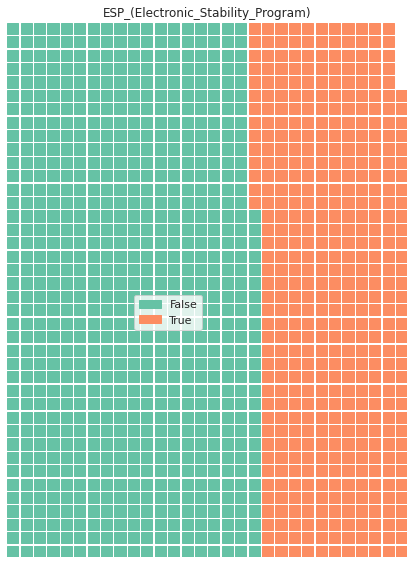

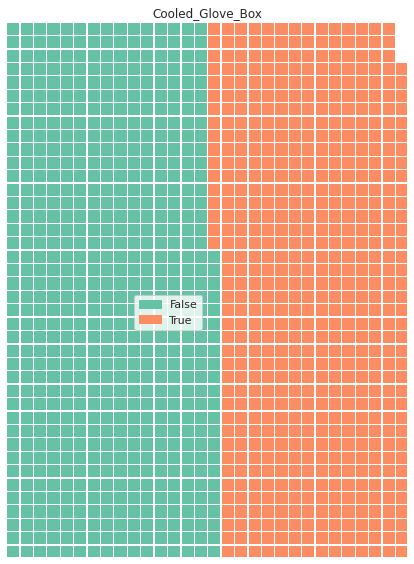

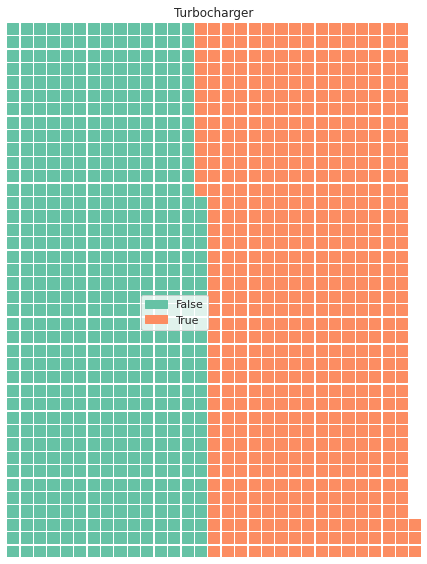

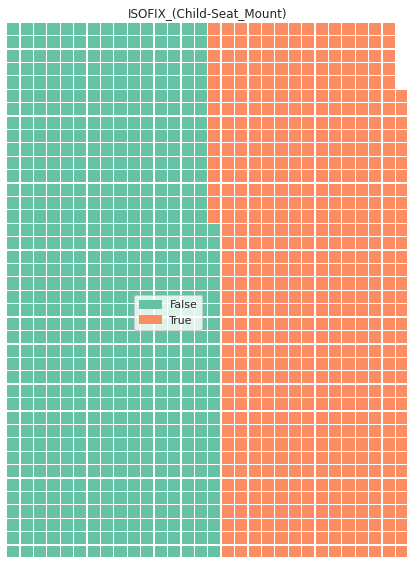

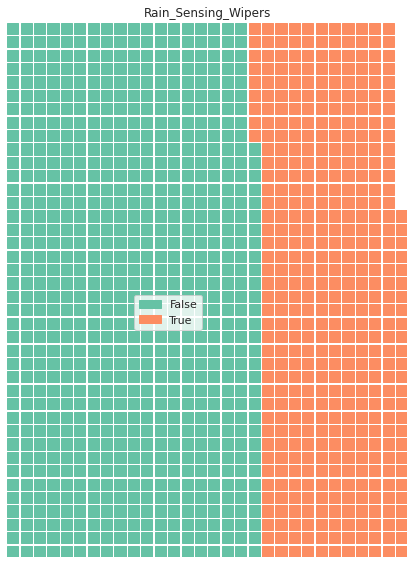

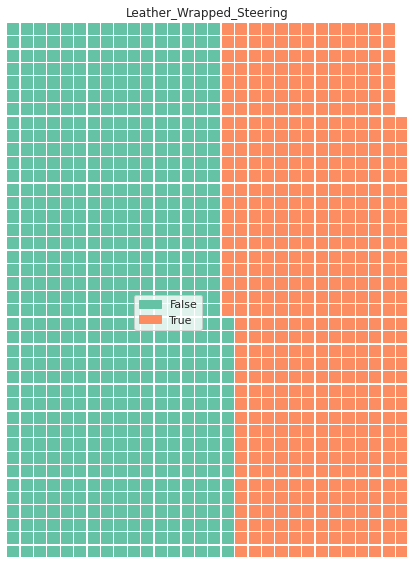

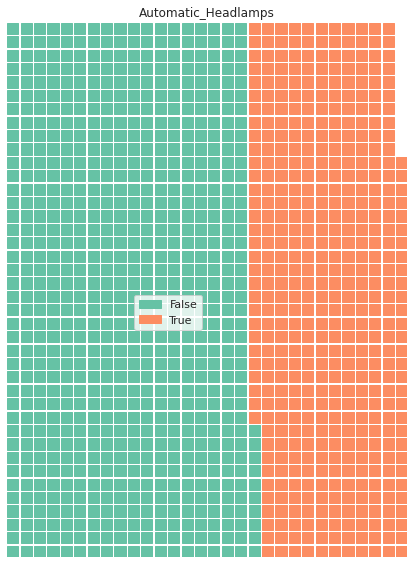

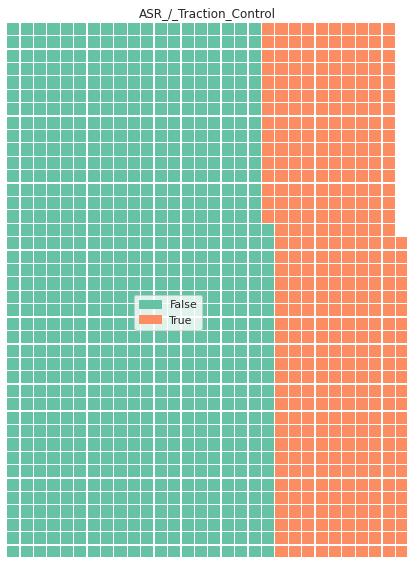

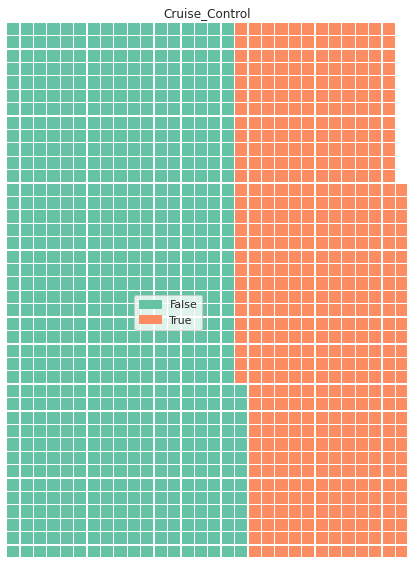

In [ ]:
bool_columns=df.select_dtypes(include=['bool']).columns
bool_columns=bool_columns.tolist()
bool_columns

for i in bool_columns :
  df_u_tf=df.groupby([i]).nunique()

  df_u_tf=df_u_tf.reset_index()
  # df_u_tf
  from pywaffle import Waffle
  fig = plt.figure(
      FigureClass=Waffle, 
      rows=40, 
      values=list(df_u_tf['Ex-Showroom_Price']),
      labels=list(df_u_tf[i]),
      title={
        'label': i,
      },
      figsize=(12, 8),
      legend={'bbox_to_anchor': (0.5, 0.5)}    
  )

In [ ]:
float_columns=df.select_dtypes(include=['float']).columns
float_columns=float_columns.tolist()
float_columns

['Ex-Showroom_Price',
 'Displacement',
 'Cylinders',
 'Valves_Per_Cylinder',
 'Fuel_Tank_Capacity',
 'Height',
 'Length',
 'Width',
 'Doors',
 'City_Mileage',
 'Ground_Clearance',
 'Seating_Capacity',
 'Wheelbase',
 'Minimum_Turning_Radius',
 'Number_of_Airbags']

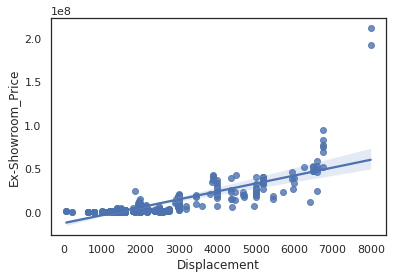

In [ ]:
float_columns=[
 'Displacement',
 'Cylinders',
 'Valves_Per_Cylinder',
 'Fuel_Tank_Capacity',
 'Height',
 'Length',
 'Width',
 'Doors',
 'City_Mileage',
 'Ground_Clearance',
 'Seating_Capacity',
 'Wheelbase',
 'Minimum_Turning_Radius',
 'Number_of_Airbags']

import seaborn as sns
import matplotlib.pyplot as plt
  
# draw regplot

sns.regplot(x = "Displacement", 
            y = "Ex-Showroom_Price", 
            data = df)
  
# show the plot
plt.show()


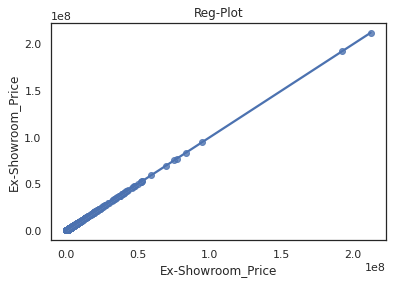

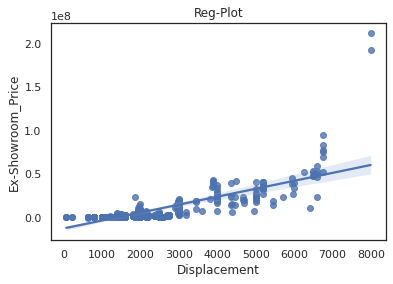

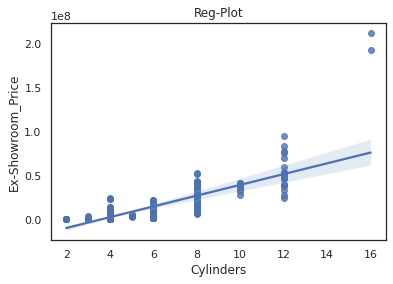

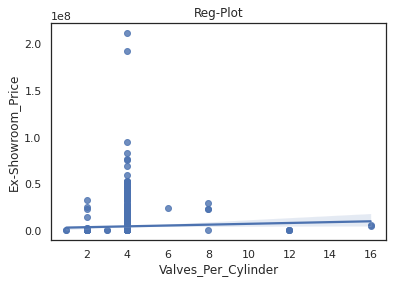

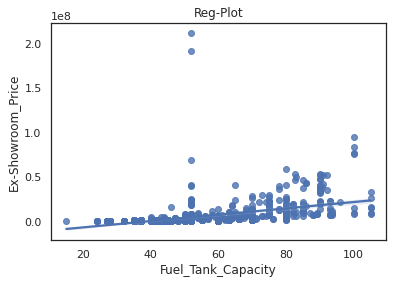

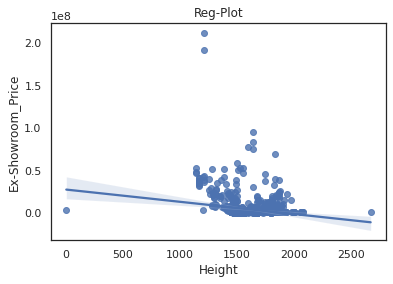

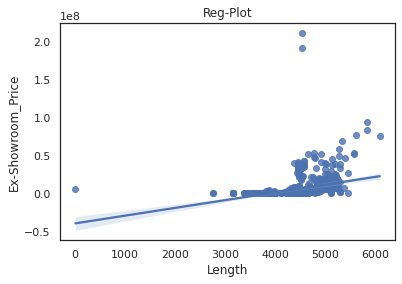

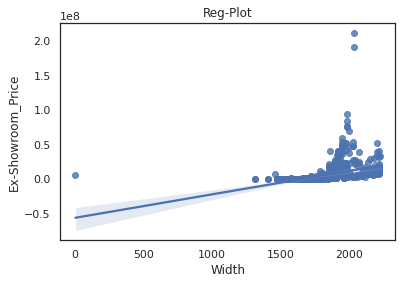

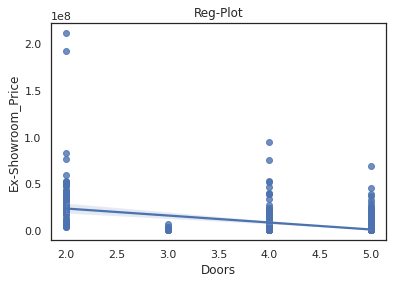

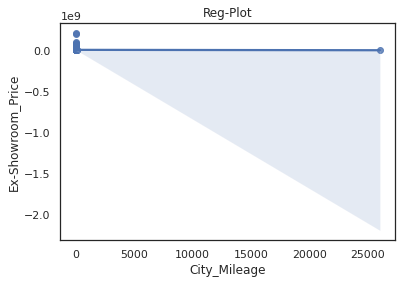

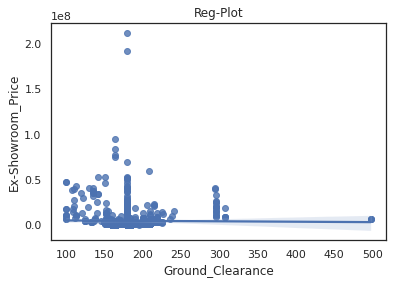

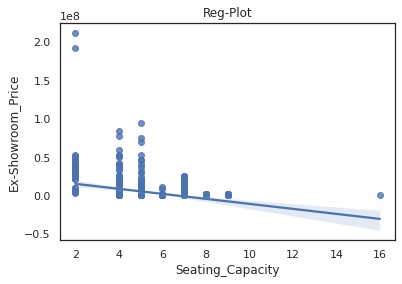

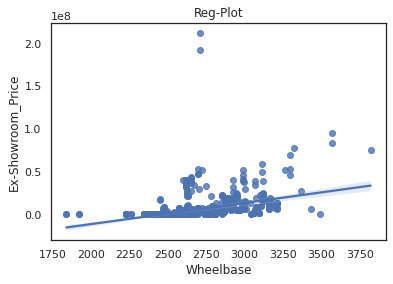

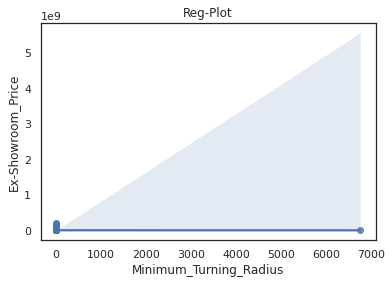

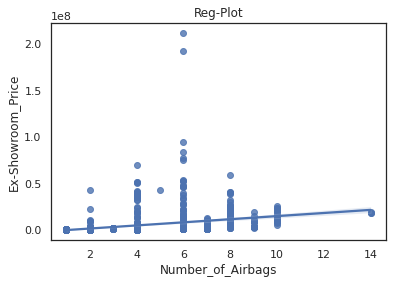

In [ ]:
float_columns=df.select_dtypes(include=['float']).columns
float_columns=float_columns.tolist()

for i in float_columns :
  sns.regplot(x = i, 
            y = "Ex-Showroom_Price", 
            data = df)
  plt.title('Reg-Plot')

  plt.show()

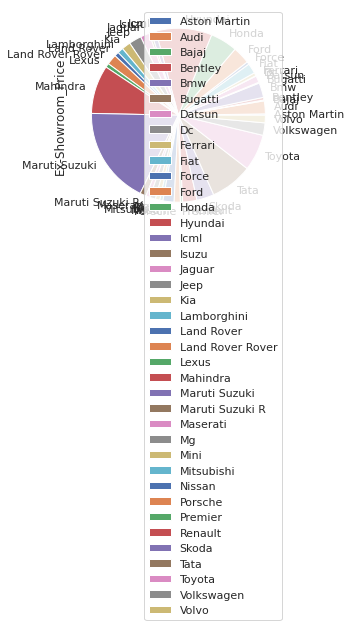

In [ ]:
#Pie charts for object Variables

df.groupby(['Make']).nunique().plot(kind='pie',y='Ex-Showroom_Price')

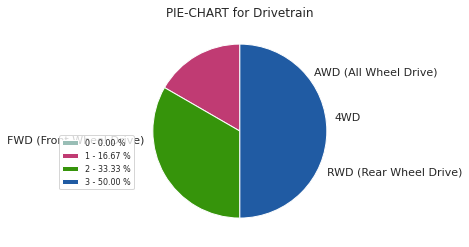

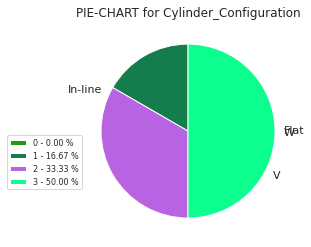

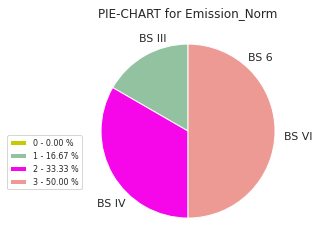

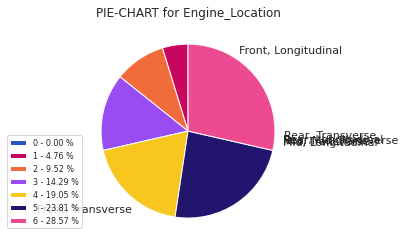

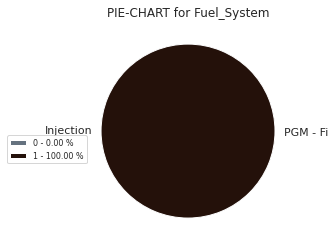

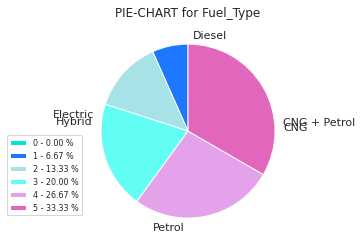

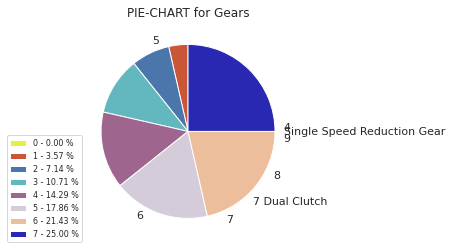

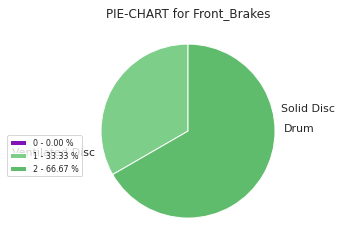

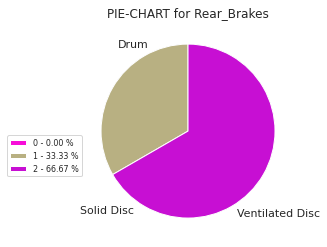

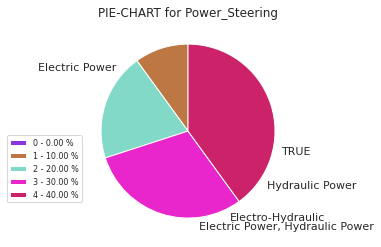

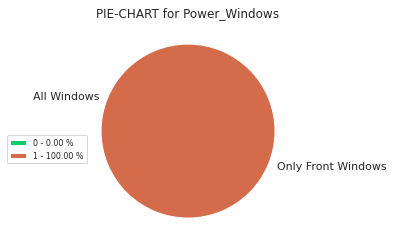

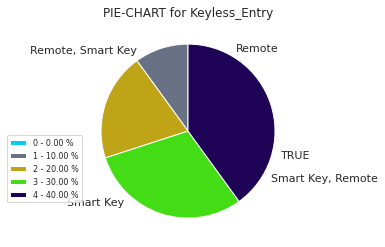

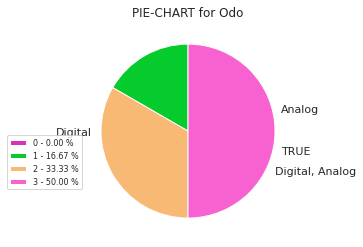

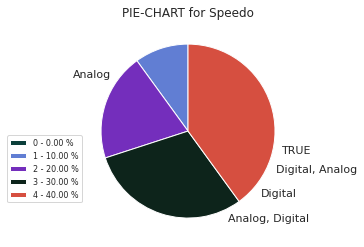

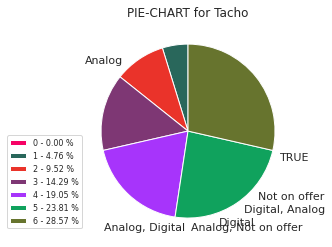

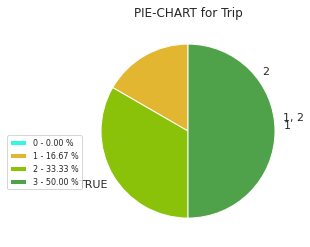

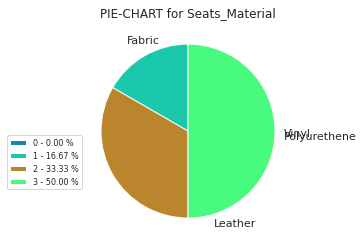

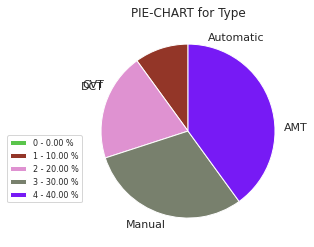

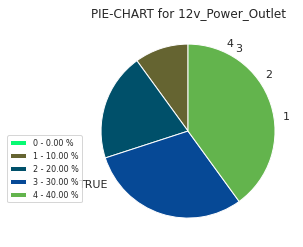

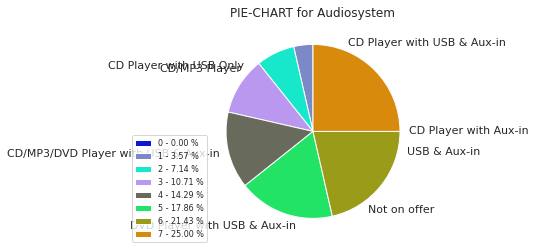

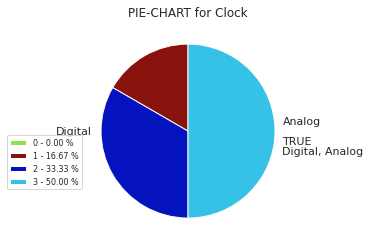

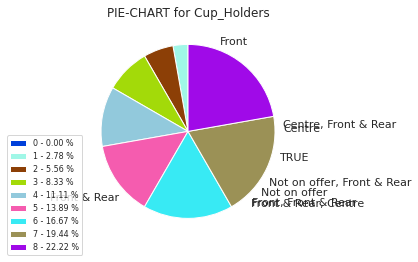

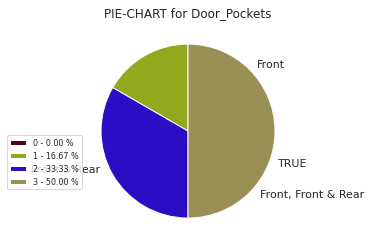

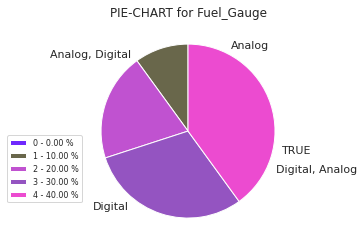

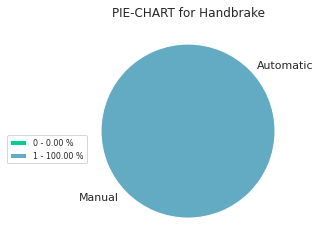

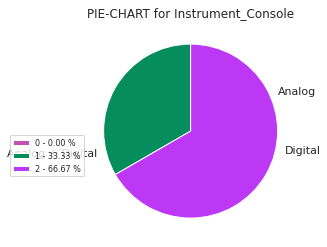

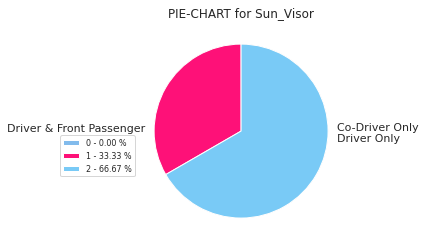

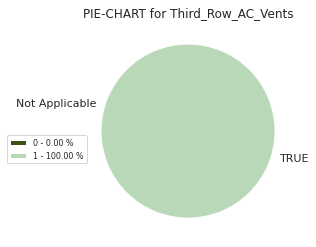

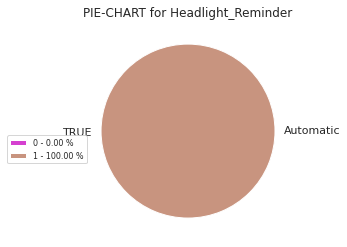

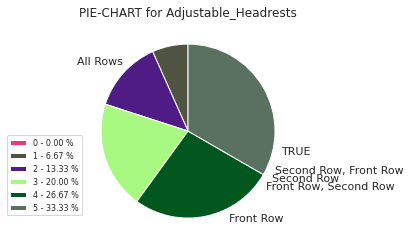

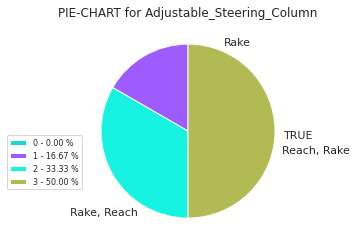

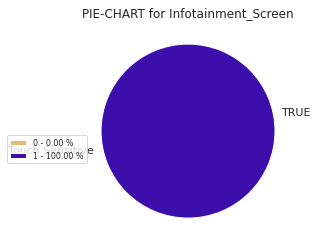

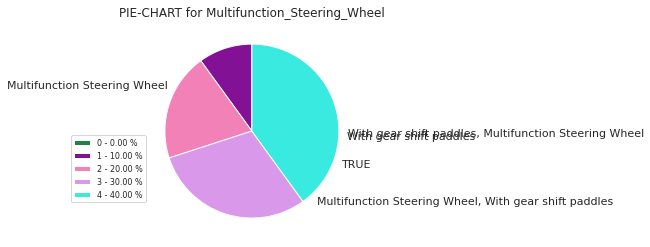

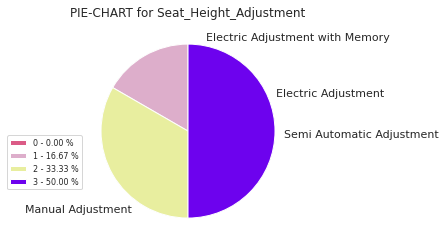

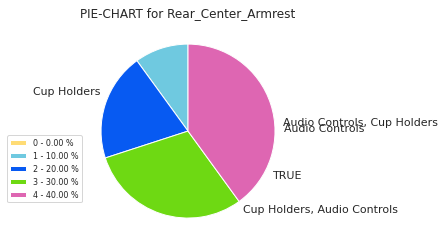

In [ ]:
import random

object_columns=df.select_dtypes(include=['object']).columns
object_columns=object_columns.tolist()

for i in object_columns :
  if(df[i].nunique()<10):
    df.groupby([i]).nunique().plot(kind='pie',y='Ex-Showroom_Price')
    n = df[i].nunique()
    slices = np.arange(n)
    activities = np.arange(n)
    colors = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    for i in range(n)]

    patches, texts = plt.pie(slices, colors=colors, startangle=90)

    labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(activities,100.*slices/slices.sum())]
    plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.35, .5), fontsize=8)
    plt.title('PIE-CHART for '+i)
    plt.ylabel('')
    plt.show()
    

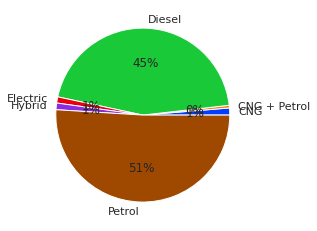

In [ ]:
import seaborn
  
# define Seaborn color palette to use
palette_color = seaborn.color_palette('bright')

df_ft=df.groupby(['Fuel_Type']).nunique()

df_ft=df_ft.reset_index()
df_ft_list=df_ft['Fuel_Type'].tolist()

# plotting data on chart
plt.pie(df_ft['Ex-Showroom_Price'],labels=df_ft_list, colors=palette_color, autopct='%.0f%%')
  
# # displaying chart

plt.show()

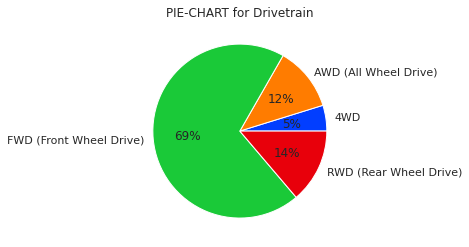

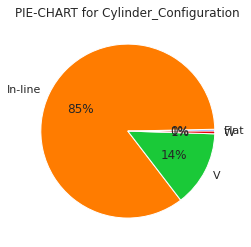

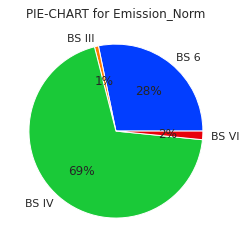

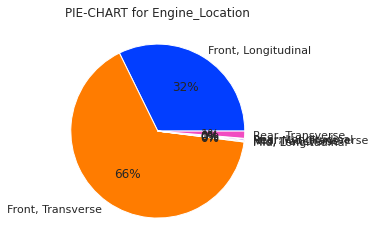

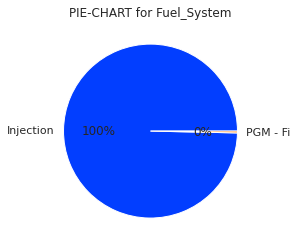

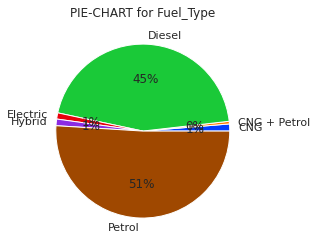

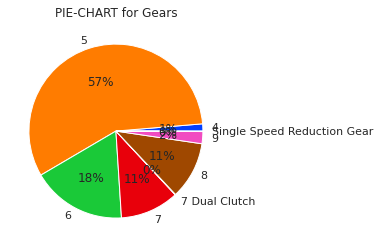

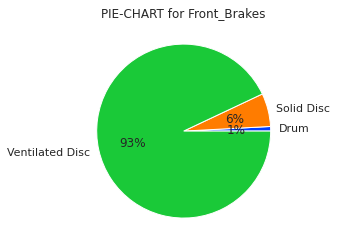

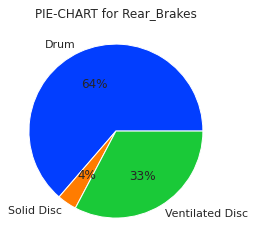

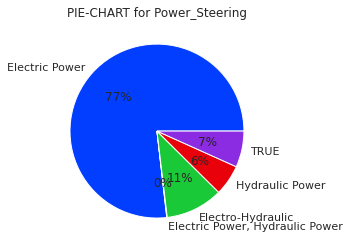

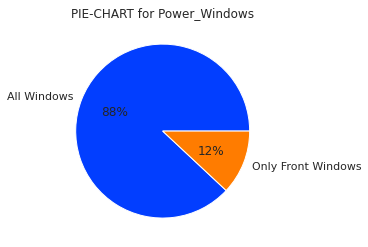

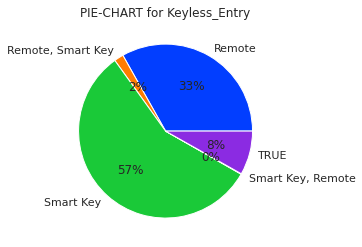

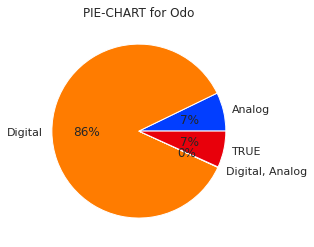

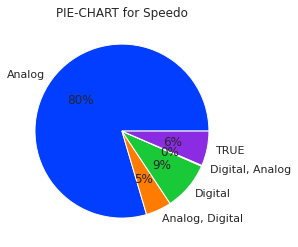

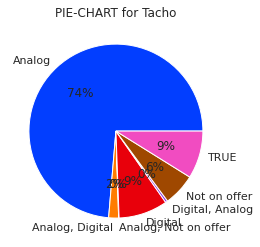

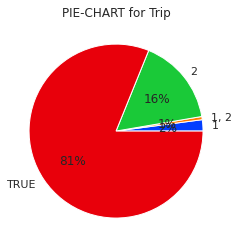

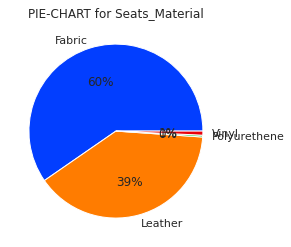

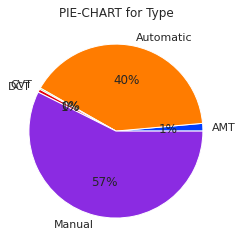

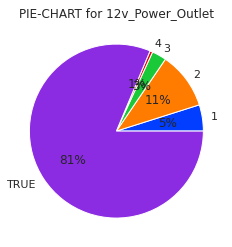

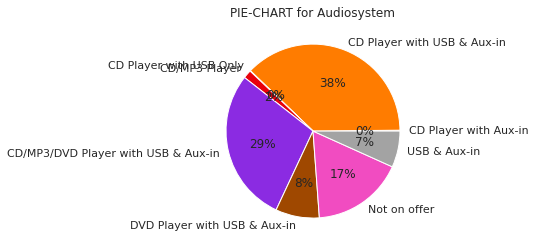

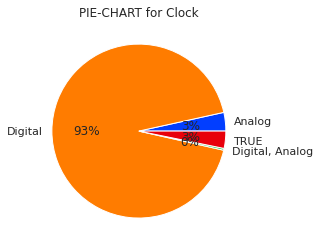

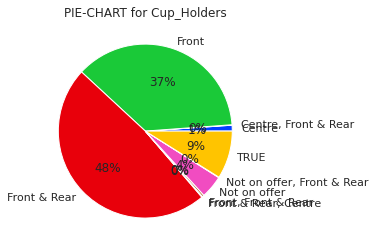

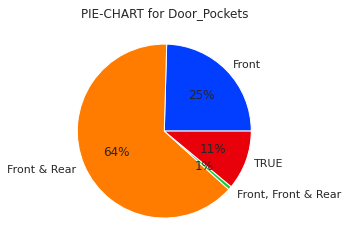

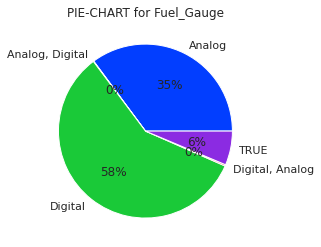

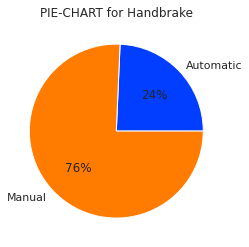

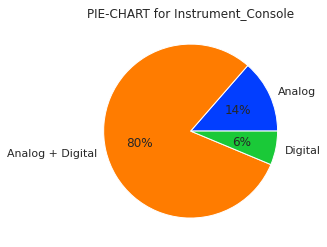

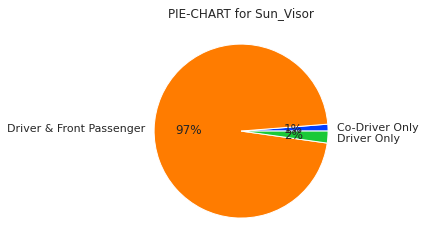

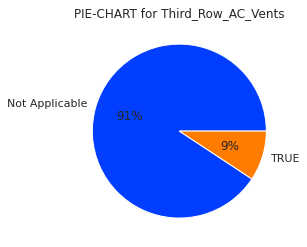

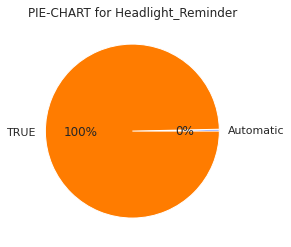

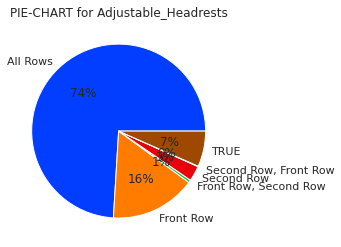

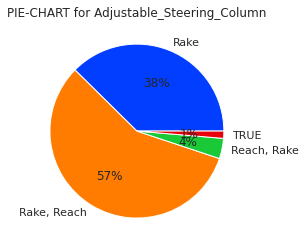

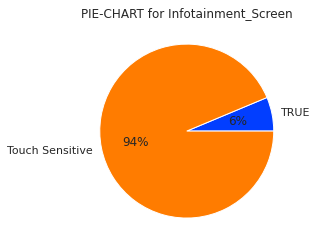

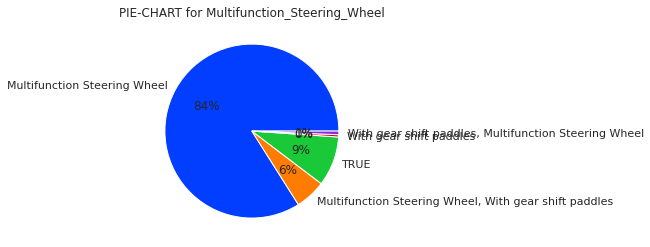

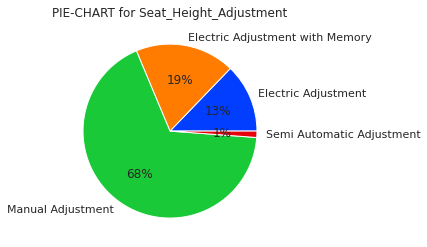

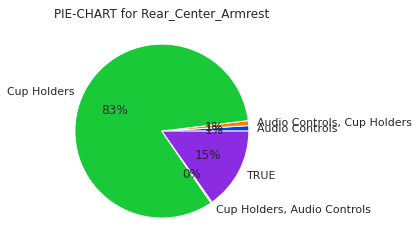

In [ ]:
object_columns=df.select_dtypes(include=['object']).columns
object_columns=object_columns.tolist()

import seaborn

for i in object_columns :
  if(df[i].nunique()<10):
    palette_color = seaborn.color_palette('bright')

    df_ft=df.groupby([i]).nunique()

    df_ft=df_ft.reset_index()
    df_ft_list=df_ft[i].tolist()

    # plotting data on chart
    plt.pie(df_ft['Ex-Showroom_Price'],labels=df_ft_list, colors=palette_color, autopct='%.0f%%')
  
    # displaying chart
    plt.title('PIE-CHART for '+i)
    plt.show()

In [ ]:




# fueltype cylinders mileage
df_test5=df[['Fuel_Type','Cylinders','Highway_Mileage']]
df_grp5 = df_test5.groupby(['Fuel_Type','Cylinders'],as_index=False).mean()
print(df_grp5)


         Engine_Location               Drivetrain  Ex-Showroom_Price
0    Front, Longitudinal                      4WD       1.405172e+07
1    Front, Longitudinal    AWD (All Wheel Drive)       1.382248e+07
2    Front, Longitudinal  FWD (Front Wheel Drive)       1.826094e+06
3    Front, Longitudinal   RWD (Rear Wheel Drive)       9.232602e+06
4      Front, Transverse                      4WD       5.490383e+06
5      Front, Transverse    AWD (All Wheel Drive)       1.141580e+07
6      Front, Transverse  FWD (Front Wheel Drive)       1.185572e+06
7      Front, Transverse   RWD (Rear Wheel Drive)       4.270318e+06
8      Mid, Longitudinal    AWD (All Wheel Drive)       2.724500e+07
9      Mid, Longitudinal   RWD (Rear Wheel Drive)       3.884582e+07
10       Mid, Transverse   RWD (Rear Wheel Drive)       2.021492e+08
11  Rear Mid, Transverse    AWD (All Wheel Drive)       1.813200e+07
12  Rear Mid, Transverse   RWD (Rear Wheel Drive)       3.407407e+06
13    Rear, Longitudinal    AWD (A

                     Ex-Showroom_Price                        \
Drivetrain                         4WD AWD (All Wheel Drive)   
Engine_Location                                                
Front, Longitudinal       1.405172e+07          1.382248e+07   
Front, Transverse         5.490383e+06          1.141580e+07   
Mid, Longitudinal                  NaN          2.724500e+07   
Mid, Transverse                    NaN                   NaN   
Rear Mid, Transverse               NaN          1.813200e+07   
Rear, Longitudinal                 NaN          3.938208e+07   
Rear, Transverse                   NaN          3.848543e+07   

                                                                     
Drivetrain           FWD (Front Wheel Drive) RWD (Rear Wheel Drive)  
Engine_Location                                                      
Front, Longitudinal             1.826094e+06           9.232602e+06  
Front, Transverse               1.185572e+06           4.270318e+06  
Mid, Long

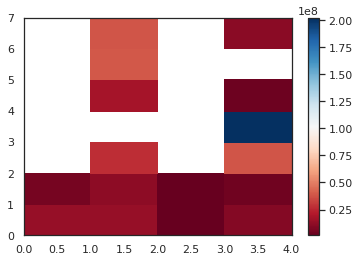

In [ ]:
# enginelocation drive_train fuel_type 
df_test1=df[['Engine_Location','Drivetrain','Ex-Showroom_Price']]
df_grp1 = df_test1.groupby(['Engine_Location','Drivetrain'],as_index=False).mean()
# print(df_grp1)

df_pivot1=df_grp1.pivot(index='Engine_Location',columns='Drivetrain')
print(df_pivot1)
plt.pcolor(df_pivot1,cmap='RdBu')
plt.colorbar()
plt.show()

                            Highway_Mileage                                   \
Fuel_Type                               CNG CNG + Petrol     Diesel Electric   
Gears                                                                          
4                                      79.0          NaN  99.000000      NaN   
5                                      79.0    84.166667  84.445902     79.0   
6                                       NaN          NaN  80.108974      NaN   
7                                       NaN          NaN  81.605263      NaN   
7 Dual Clutch                           NaN          NaN        NaN      NaN   
8                                       NaN          NaN  75.163934      NaN   
9                                       NaN          NaN  78.450000      NaN   
Single Speed Reduction Gear             NaN          NaN        NaN     79.0   

                                               
Fuel_Type                   Hybrid     Petrol  
Gears                  

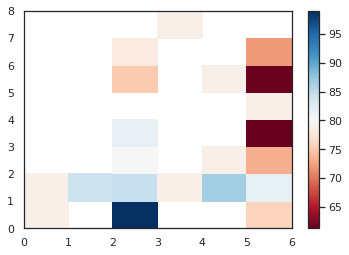

In [ ]:
# gears and fueltype highway mileage
df_test2=df[['Gears','Fuel_Type','Highway_Mileage']]
df_grp2 = df_test2.groupby(['Gears','Fuel_Type'],as_index=False).mean()
# print(df_grp2)
df_pivot2=df_grp2.pivot(index='Gears',columns='Fuel_Type')
print(df_pivot2)
plt.pcolor(df_pivot2,cmap='RdBu')
plt.colorbar()
plt.show()

                        Ex-Showroom_Price                                   \
Body_Type                     Convertible         Coupe Coupe, Convertible   
Drivetrain                                                                   
4WD                           36019078.00  4.746770e+07                NaN   
AWD (All Wheel Drive)         30712241.25  3.230237e+07         43367500.0   
FWD (Front Wheel Drive)        9437398.40           NaN                NaN   
RWD (Rear Wheel Drive)        27789278.50  2.215978e+07                NaN   

                                                                      \
Body_Type                    Crossover Crossover, SUV      Hatchback   
Drivetrain                                                             
4WD                                NaN            NaN            NaN   
AWD (All Wheel Drive)              NaN      3675000.0            NaN   
FWD (Front Wheel Drive)  814852.611111            NaN  766102.375817   
RWD (Rear Wheel Drive

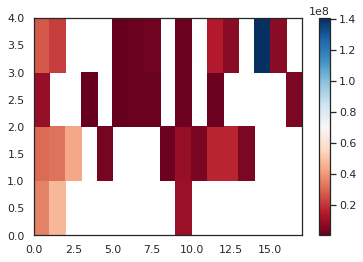

In [ ]:
# drive_train bodytype price
df_test3=df[['Drivetrain','Body_Type','Ex-Showroom_Price']]
df_grp3 = df_test3.groupby(['Drivetrain','Body_Type'],as_index=False).mean()
# print(df_grp3)
df_pivot3=df_grp3.pivot(index='Drivetrain',columns='Body_Type')
print(df_pivot3)
plt.pcolor(df_pivot3,cmap='RdBu')
plt.colorbar()
plt.show()

                            Ex-Showroom_Price                                  \
Power_Steering                 Electric Power Electric Power, Hydraulic Power   
Gears                                                                           
4                                7.577874e+05                             NaN   
5                                1.322869e+06                        890200.0   
6                                1.616378e+06                             NaN   
7                                1.094636e+07                             NaN   
7 Dual Clutch                    2.121554e+08                             NaN   
8                                1.567470e+07                             NaN   
9                                6.934220e+06                             NaN   
Single Speed Reduction Gear      2.371858e+06                             NaN   

                                                                             
Power_Steering              El

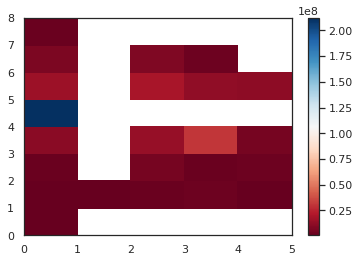

In [ ]:
#  gears powersteering price
df_test4=df[['Gears','Power_Steering','Ex-Showroom_Price']]
df_grp4 = df_test4.groupby(['Gears','Power_Steering'],as_index=False).mean()
# print(df_grp4)

df_pivot4=df_grp4.pivot(index='Gears',columns='Power_Steering')
print(df_pivot4)
plt.pcolor(df_pivot4,cmap='RdBu')
plt.colorbar()
plt.show()

             Highway_Mileage                                         \
Cylinders               2.0        3.0        4.0   5.0        6.0    
Fuel_Type                                                             
CNG                     79.0  79.000000  79.000000   NaN        NaN   
CNG + Petrol             NaN  79.000000  86.750000   NaN        NaN   
Diesel                   NaN  94.533333  83.072495  78.0  65.444444   
Electric                 NaN        NaN  79.000000   NaN        NaN   
Hybrid                   NaN        NaN  85.888889   NaN  79.000000   
Petrol                  79.0  89.807453  74.979943  79.0  68.456522   

                                                
Cylinders          8.0   10.0       12.0  16.0  
Fuel_Type                                       
CNG                 NaN   NaN        NaN   NaN  
CNG + Petrol        NaN   NaN        NaN   NaN  
Diesel        51.000000   NaN        NaN   NaN  
Electric            NaN   NaN        NaN   NaN  
Hybrid           

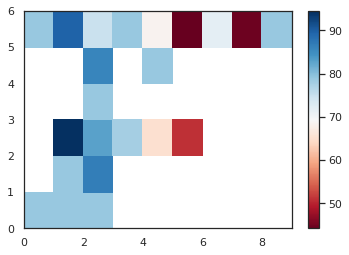

In [ ]:
# fueltype cylinders mileage
df_test5=df[['Fuel_Type','Cylinders','Highway_Mileage']]
df_grp5 = df_test5.groupby(['Fuel_Type','Cylinders'],as_index=False).mean()
# print(df_grp5)

df_pivot5=df_grp5.pivot(index='Fuel_Type',columns='Cylinders')
print(df_pivot5)
plt.pcolor(df_pivot5,cmap='RdBu')
plt.colorbar()
plt.show()